# Options Calculator with Binomial model

#### Input variables:
  * Underlying price (per share): S; 
  * Strike price of the option (per share): K;
  * Time to maturity (years): T;
  * Continuously compounding risk-free interest rate: r;
  * Volatility: sigma;
  * Number of binomial steps: N

In [4]:
## import certain packages
import math
from datetime import datetime, date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [5]:
def Cox_Ross_Rubinstein_Tree (S,K,T,r,sigma,N, Option_type):
    
    # Underlying price (per share): S; 
    # Strike price of the option (per share): K;
    # Time to maturity (years): T;
    # Continuously compounding risk-free interest rate: r;
    # Volatility: sigma;
    # Number of binomial steps: N;

        # The factor by which the price rises (assuming it rises) = u ;
        # The factor by which the price falls (assuming it falls) = d ;
        # The probability of a price rise = pu ;
        # The probability of a price fall = pd ;
        # discount rate = disc ;
    
    u=math.exp(sigma*math.sqrt(T/N));
    d=math.exp(-sigma*math.sqrt(T/N));
    pu=((math.exp(r*T/N))-d)/(u-d);
    pd=1-pu;
    disc=math.exp(-r*T/N);

    St = [0] * (N+1)
    C = [0] * (N+1)
    
    St[0]=S*d**N;
    
    for j in range(1, N+1): 
        St[j] = St[j-1] * u/d;
    
    for j in range(1, N+1):
        if Option_type == 'P':
            C[j] = max(K-St[j],0);
        elif Option_type == 'C':
            C[j] = max(St[j]-K,0);
    
    for i in range(N, 0, -1):
        for j in range(0, i):
            C[j] = disc*(pu*C[j+1]+pd*C[j]);
            
    return C[0]


## define Jarrow_Rudd binomial model    
def Jarrow_Rudd_Tree (S,K,T,r,sigma,N, Option_type):

    # Underlying price (per share): S; 
    # Strike price of the option (per share): K;
    # Time to maturity (years): T;
    # Continuously compounding risk-free interest rate: r;
    # Volatility: sigma;
    # Steps: N;
    
        # The factor by which the price rises (assuming it rises) = u ;
        # The factor by which the price falls (assuming it falls) = d ;
        # The probability of a price rise = pu ;
        # The probability of a price fall = pd ;
        # discount rate = disc ;
        
    u=math.exp((r-(sigma**2/2))*T/N+sigma*math.sqrt(T/N));
    d=math.exp((r-(sigma**2/2))*T/N-sigma*math.sqrt(T/N));
    pu=0.5;
    pd=1-pu;
    disc=math.exp(-r*T/N);

    St = [0] * (N+1)
    C = [0] * (N+1)
    
    St[0]=S*d**N;
    
    for j in range(1, N+1): 
        St[j] = St[j-1] * u/d;
    
    for j in range(1, N+1):
        if Option_type == 'P':
            C[j] = max(K-St[j],0);
        elif Option_type == 'C':
            C[j] = max(St[j]-K,0);
    
    for i in range(N, 0, -1):
        for j in range(0, i):
            C[j] = disc*(pu*C[j+1]+pd*C[j]);
            
    return C[0]

##### Input

In [6]:
S=100;
K=100;
T=1;
r=0.05;
sigma=0.2;

In [7]:
data = {'Symbol': ['S', 'K', 'T', 'r', 'sigma'],
        'Input': [S, K, T , r , sigma]}
input_frame = DataFrame(data, columns=['Symbol', 'Input'], 
                   index=['Underlying price', 'Strike price', 'Time to maturity', 'Risk-free interest rate', 'Volatility'])
input_frame

,Symbol,Input
Underlying price,S,100.00
Strike price,K,100.00
Time to maturity,T,1.00
Risk-free interest rate,r,0.05
Volatility,sigma,0.20


##### Output

In [8]:
r = r/100; sigma = sigma/100;
binomial_model_pricing = {'Option' : ['Call', 'Put', 'Call', 'Put'],
                          'Price': [Cox_Ross_Rubinstein_Tree(S, K, T, r, sigma,1000,'C'), Cox_Ross_Rubinstein_Tree(S, K, T, r, sigma,1000,'P'),
                                     Jarrow_Rudd_Tree(S, K, T, r, sigma,1000,'C'), Jarrow_Rudd_Tree(S, K, T, r, sigma,1000,'P')]}
binomial_model_pricing_frame = DataFrame(binomial_model_pricing, columns=[ 'Option', 'Price'], 
                   index = ['Cox-Ross-Rubinstein','Cox-Ross-Rubinstein', 'Jarrow-Rudd', 'Jarrow-Rudd'])                                        
binomial_model_pricing_frame

,Option,Price
Cox-Ross-Rubinstein,Call,0.107222
Cox-Ross-Rubinstein,Put,0.057234
Jarrow-Rudd,Call,0.107232
Jarrow-Rudd,Put,0.057244


##### Plot call / put options price with different steps

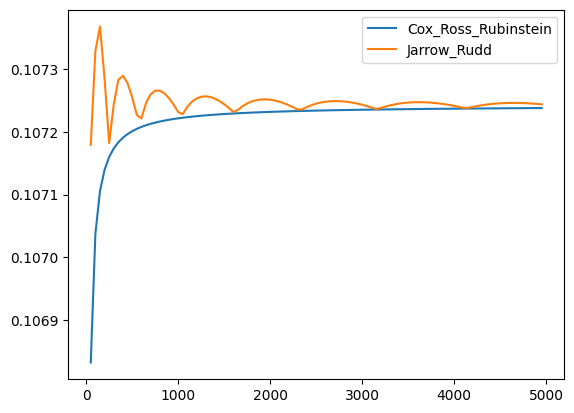

In [9]:
## call option with different steps 
runs1 = list(range(50,5000,50))
CRR1 = []
JR1 = []

for i in runs1:
    CRR1.append(Cox_Ross_Rubinstein_Tree(S, K, T, r, sigma,i ,'C'))
    JR1.append(Jarrow_Rudd_Tree(S, K, T, r, sigma,i ,'C'))

plt.plot(runs1, CRR1, label='Cox_Ross_Rubinstein')
plt.plot(runs1, JR1, label='Jarrow_Rudd')
plt.legend(loc='upper right')
plt.show()